In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [8]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [71]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Checking null value

In [41]:
for column in sorted(train.columns):
    null_cnt = train[column].isnull().sum()
    if null_cnt == False:
        continue
    ratio = train[column].isnull().sum() / train[column].shape[0]
    print('Percentage of null data in column {} : {:.2f}%'.format(column , ratio * 100))

Percentage of null data in column Age : 19.87%
Percentage of null data in column Cabin : 77.10%
Percentage of null data in column Embarked : 0.22%


In [42]:
for column in sorted(test.columns):
    null_cnt = test[column].isnull().sum()
    if null_cnt == False:
        continue
    ratio = null_cnt / test[column].shape[0]
    print('Percentage of null data in column {} : {:.2f}%'.format(column, ratio * 100))

Percentage of null data in column Age : 20.57%
Percentage of null data in column Cabin : 78.23%
Percentage of null data in column Fare : 0.24%


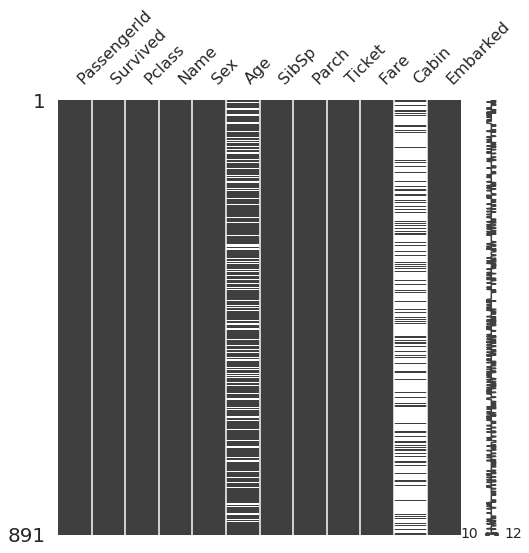

In [83]:
msno.matrix(df=train, figsize=(8,8))

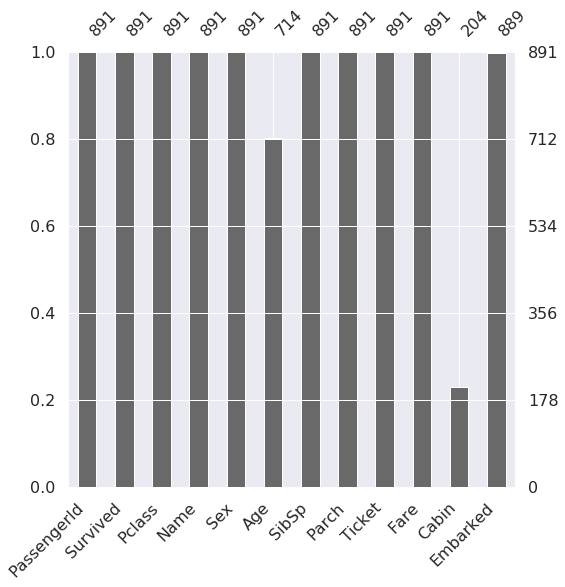

In [82]:
msno.bar(df=train, figsize=(8,8))

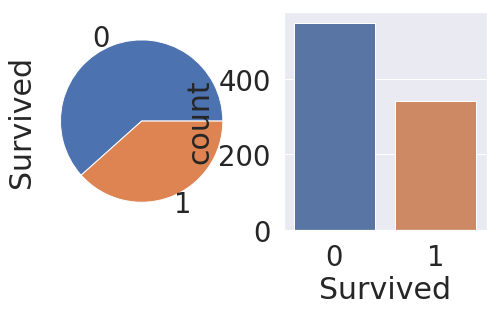

In [111]:
f, ax = plt.subplots(1,2, figsize=(8, 4))
train['Survived'].value_counts().plot.pie(ax=ax[0])
sns.countplot('Survived', data=train, ax=ax[1])
plt.show()

In [115]:
survived = train['Survived'].value_counts()
for idx, value in survived.iteritems():
    if idx == 0:
        print('People who are dead : {:.1f}%'.format((value/survived.sum()) * 100))
    else:
        print('People who survived : {:.1f}%'.format((value/survived.sum()) * 100))

People who are dead : 61.6%
People who survived : 38.4%
